In [2]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline

import platform
BASEDIR = "/u/timoh/phd" if "freya" in platform.node() else ""

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [9]:
import os
import re
import sys
import glob
import numpy
import scipy
from matplotlib import pyplot
pyplot.style.use("tlrh")

if "/tidalshocks/src" not in sys.path:
    sys.path.insert(0, "{}/tidalshocks/src".format(BASEDIR))
from mw_gc_observation import MwGcObservation

if "/supaharris" not in sys.path: 
    sys.path.insert(0, "{}/supaharris".format(BASEDIR))
from utils import parsec2arcmin

import logging
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.basicConfig(stream=sys.stdout, format="%(message)s")
logger = logging.getLogger(); logger.level = logging.INFO
for h in logger.handlers: h.setLevel(logger.level)
    
from amuse.units import units
from amuse.units import constants
from amuse.io import read_set_from_file

from amuse_wrapper import get_particle_properties
from test_stability_in_isolation import plot_diagnostics
from test_stability_in_isolation import analyse_snapshot
from test_stability_in_isolation import analyse_isolation

In [ ]:
-4.28047e+06 2.43946e+06

In [22]:
obs = MwGcObservation(logger, "NGC104")
limepy_model, limepy_sampled, amuse_sampled, converter = \
    obs.sample_deBoer2019_bestfit_king(Nstars=Nstars, verbose=True)

 Model scaled to: G = 0.00449945056135, M = 107803.319, rt = 52.496

 Model properties: 
 ----------------- 
 phi0 =  8.58; g = 1.00
 Converged = True
 M =  1.078e+05; U = -4.250e+06; K = 2.125e+06; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.069; rh/r0 = 11.103; rt/r0 = 101.292; ra/rh = 9006670.067
limepy.limepy took 0.06 s
 sample r ...
 sample v ...
   set-up segments for velocity cdf ...
   compute cdf ...
   (rejection) sampling of k^3/2 values ...
   sample angles ...
 convert to cartesian coordinates ...
 done! 
       U: sample =  -4.2506e+06; model =  -4.2496e+06
       K: sample =   2.1304e+06; model =   2.1248e+06
       Q: sample =  -5.0119e-01; model =  -5.0000e-01
  2Kr/Kt: sample =       0.9984; model =       1.0000
limepy.sample took 7.43 s
convert to AMUSE took 0.02 s
  com:       [-4.21830566169e-17, -7.32930608718e-17, -7.40839931834e-17] parsec
  comvel:    [-4.35012771362e-17, 5.69471264328e-17, -2.79462750087e-17] km / s
  Mtot:      107803.319 MSun
  Ekin:      4.2371

In [ ]:
Nstars = 5000
for gc_name in ["NGC 104"]:
    obs = MwGcObservation(logger, gc_name)
    limepy_model, limepy_sampled, amuse_sampled, converter = \
        obs.sample_deBoer2019_bestfit_king(Nstars=Nstars, verbose=True)

    fig = plot_diagnostics(obs, limepy_model, amuse_sampled, model_name="king", Tsnap=None, 
            softening=0.1, rmin=1e-3, rmax=1e3, Nbins=None, fig=None)
    pyplot.show()

# Analyse a single snapshot 

In [ ]:
%matplotlib inline
pyplot.style.use("tlrh")

obs = MwGcObservation(logger, "NGC 104")

model_name = "king"
Nstars = 1000
softening = 0.1
seed = 1337
folder = "{}_{}_isolation_{}_{}_{}".format(obs.gc_slug, model_name, Nstars, softening, seed)
snap_base = "{}{}/{}_{}_isolation_{}_{}_{}_*.h5".format(obs.outdir, folder,
    obs.gc_slug, model_name, Nstars, softening, seed)
snapshots = sorted(glob.glob(snap_base), key=lambda s:
    [ int(c) for c in re.split('(\d+)', s) if c.isdigit()]
)
Nsnaps = len(snapshots)
print("\nFound {0} snapshots".format(Nsnaps))

args = []
kwargs = {
    "obs": obs,
    "model_name": model_name,
    "limepy_model": limepy_model,
    "isolation": True,
    "softening": softening,
    "seed": seed,
}

for i_fname_tuple in enumerate(snapshots):
    analyse_snapshot(i_fname_tuple, *args, **kwargs)
    break

# Analyse all snapshots for a particular simulation 

limepy.limepy took 0.07 s
limepy.sample took 0.08 s
convert to AMUSE took 0.00 s

Found 101 snapshots
  Loading snapshot 0: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0000.h5
  Loading snapshot 4: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0004.h5
  Loading snapshot 1: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0001.h5
  Loading snapshot 2: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0002.h5
  Loading snapshot 3: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0003.h5
  Loading snapshot 5: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0005.h5
  Loading snapshot 8: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_

  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0004.h5 was saved at T=40.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0015.h5 was saved at T=150.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0019.h5 was saved at T=190.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0023.h5 was saved at T=230.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0012.h5 was saved at T=120.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0032.h5 was saved at T=320.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0033.h5 was saved at T=330.

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0014.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0011.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0006.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0026.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0000.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0032.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0034.png
  Saved: /u/timoh/phd/tidalshocks/

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0036.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0003.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0026.png
  Loading snapshot 46: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0046.h5
get_radial_profiles took 0.01 s
get_radial_profiles took 0.01 s
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0046.h5 was saved at T=460.00 Myr
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0001.png
_project_amuse took 0.02 s
  Loading snapshot 47: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolati

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0024.png
_project_amuse took 0.03 s
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0025.png
  Loading snapshot 57: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0057.h5
  Loading snapshot 58: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0058.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0058.h5 was saved at T=580.00 Myr
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0022.png
  Loading snapshot 59: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0059.h5
  

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0009.png
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0070.h5 was saved at T=700.00 Myr
_project_amuse took 0.02 s
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0069.h5 was saved at T=690.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0071.h5 was saved at T=710.00 Myr
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0016.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0027.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0061.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0063.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0073.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0071.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0069.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0064.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0070.png
  Saved: /u/timoh/phd/tidalshocks/

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0043.png
  Loading snapshot 87: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0087.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0086.h5 was saved at T=860.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0087.h5 was saved at T=870.00 Myr
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0053.png
  Loading snapshot 88: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0088.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0088.h5 was saved at T=880.00 Myr
  Saved: /u/timoh/

_project_amuse took 0.02 s
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0061.png
  Loading snapshot 100: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0100.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0099.h5 was saved at T=990.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0100.h5 was saved at T=1000.00 Myr
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_SigmaR_vs_R_0085.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0064.png
get_radial_profiles took 0.01 s
get_radial_profiles took 0.01 s
get_radial_profiles took 0.01 s
get_radial_profiles took 0.01 s
  Sa

  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0083.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0087.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_timesteps_0083.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0084.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0090.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0088.png
  Saved: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_diagnostics_0085.png
  Saved: /u/timoh/phd/tidalshocks/ou

array([[0.0, array([ -1.34985781e-16,   6.74928906e-17,  -2.10915283e-16]),
        array([  1.09675947e-16,   1.47640698e-16,  -2.53098340e-17]),
        107803.31900000005, 4.6389831390153529e+42,
        -8.1443772709329202e+42,
        array([ -26285.46486915,  -64050.81238799, -118590.4256519 ]),
        array([  1.20917086e-11,   1.62773000e-11,  -2.79039429e-12])],
       [9.9999979138374311, array([ 0.30980485, -0.1728215 ,  0.08984766]),
        array([ 0.0638265 , -0.04806972,  0.02828004]), 107803.31900000005,
        3.5293789146372459e+42, -7.0349486783549411e+42,
        array([ -29942.0364416 ,  -66233.59166167, -116922.96802765]),
        array([ 7036.8339464 , -5299.65795536,  3117.85755327])],
       [19.999995827674862, array([ 1.27228693, -0.84124756,  0.06970494]),
        array([ 0.1217155 , -0.08934928, -0.0090107 ]), 107803.31900000005,
        3.52695956199343e+42, -7.0194040074289897e+42,
        array([ -25470.41714105,  -64536.29654873, -115104.88530759]),
 

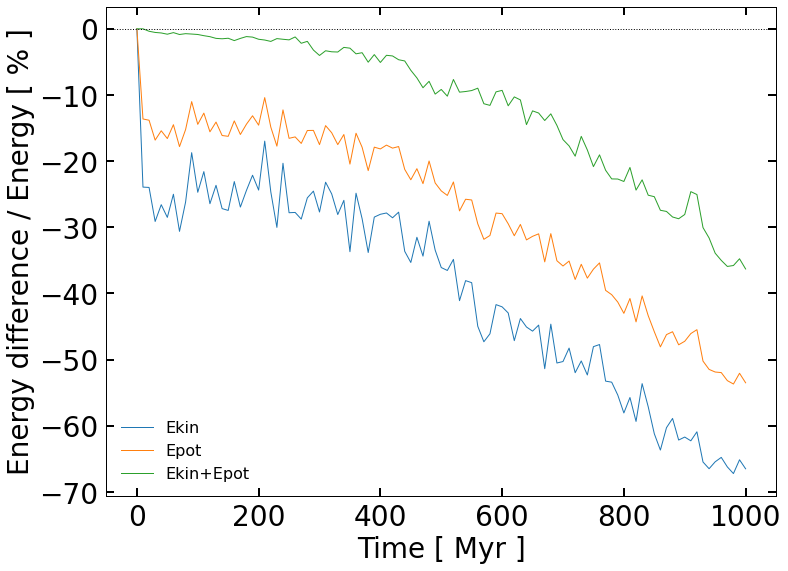

In [19]:
obs = MwGcObservation(logger, "NGC 104")
analyse_isolation(obs, "king", 1000, 0.1, 1337)

# Compare NGC 104, King, $\epsilon = 0.1$, 1337, $N\in[10^3, 10^4, 10^5]$

In [20]:
obs = MwGcObservation(logger, "NGC 104")

info_all = []
model_name = "king"
softening = 0.1
seed = 1337
for Nstars in [1000, 10000, 100000]:
    info_all.append(
        analyse_isolation(obs, model_name, Nstars, softening, seed, must_plot=False)
    )


Found 101 snapshots
  Loading snapshot 0: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0000.h5
  Loading snapshot 2: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0002.h5
  Loading snapshot 1: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0001.h5
  Loading snapshot 4: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0004.h5
  Loading snapshot 6: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0006.h5
  Loading snapshot 3: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0003.h5
  Loading snapshot 5: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0005.h5
  Loading sna

  Loading snapshot 33: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0033.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0026.h5 was saved at T=260.00 Myr
  Loading snapshot 35: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0035.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0030.h5 was saved at T=300.00 Myr
  Loading snapshot 36: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0036.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0027.h5 was saved at T=270.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0028.h5 was saved at T=280.00 Myr
  /u/ti

  Loading snapshot 65: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0065.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0057.h5 was saved at T=570.00 Myr
  Loading snapshot 64: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0064.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0053.h5 was saved at T=530.00 Myr
  Loading snapshot 63: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0063.h5
  Loading snapshot 67: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0067.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0055.h5 was saved at T=550.00 Myr
  Loading sn

  Loading snapshot 89: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0089.h5
  Loading snapshot 90: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0090.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0088.h5 was saved at T=880.00 Myr
  Loading snapshot 91: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0091.h5
  Loading snapshot 92: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0092.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0081.h5 was saved at T=810.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_1337/ngc104_king_isolation_1000_0.1_1337_0085.h5 was saved at T=850.00 Myr
  Loading sn

  Loading snapshot 28: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0028.h5
  Loading snapshot 32: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0032.h5
  Loading snapshot 34: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0034.h5
  Loading snapshot 33: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0033.h5
  Loading snapshot 35: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0035.h5
  Loading snapshot 38: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0038.h5
  Loading snapshot 37: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0037.h5
  Loading sna

  Loading snapshot 45: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0045.h5
  Loading snapshot 46: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0046.h5
  Loading snapshot 47: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0047.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0043.h5 was saved at T=43.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0044.h5 was saved at T=44.00 Myr
  Loading snapshot 49: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0049.h5
  Loading snapshot 51: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0051.h5
  Loa

  Loading snapshot 73: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0073.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0073.h5 was saved at T=73.00 Myr
  Loading snapshot 74: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0074.h5
  Loading snapshot 75: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0075.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0074.h5 was saved at T=74.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0075.h5 was saved at T=75.00 Myr
  Loading snapshot 76: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_10000_0.1_1337/ngc104_king_isolation_10000_0.1_1337_0076.h5
 

  Loading snapshot 4: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0004.h5
  Loading snapshot 3: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0003.h5
  Loading snapshot 2: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0002.h5
  Loading snapshot 5: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0005.h5
  Loading snapshot 6: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0006.h5
  Loading snapshot 8: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0008.h5
  Loading snapshot 7: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0007.h5
  Load

  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0015.h5 was saved at T=15.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0039.h5 was saved at T=39.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0016.h5 was saved at T=16.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0017.h5 was saved at T=17.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0022.h5 was saved at T=22.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0023.h5 was saved at T=23.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0001

  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0054.h5 was saved at T=54.00 Myr
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0058.h5 was saved at T=58.00 Myr
  Loading snapshot 59: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0059.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0059.h5 was saved at T=59.00 Myr
  Loading snapshot 60: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0060.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0060.h5 was saved at T=60.00 Myr
  Loading snapshot 61: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_

  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0085.h5 was saved at T=85.00 Myr
  Loading snapshot 87: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0087.h5
  Loading snapshot 88: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0088.h5
  Loading snapshot 89: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0089.h5
  Loading snapshot 90: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0090.h5
  Loading snapshot 91: /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0091.h5
  /u/timoh/phd/tidalshocks/out/ngc104/ngc104_king_isolation_100000_0.1_1337/ngc104_king_isolation_100000_0.1_1337_0087.h5 was saved at T=8

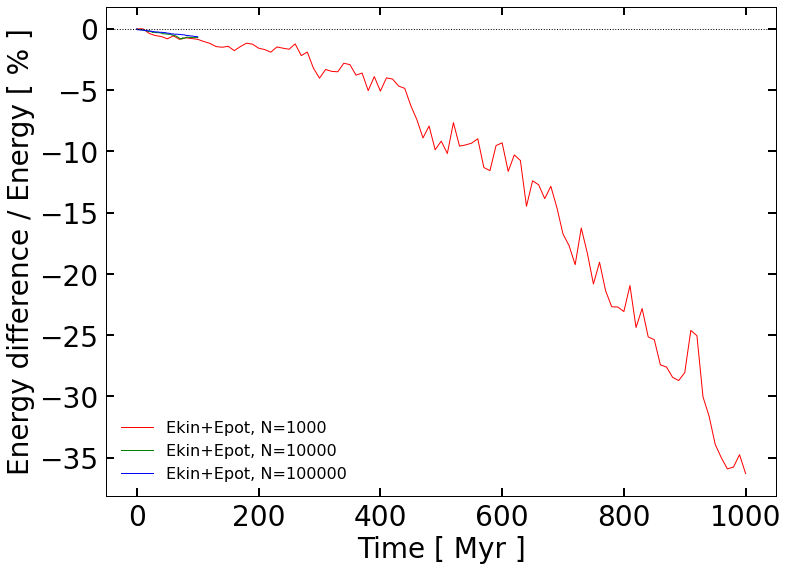

In [21]:
%matplotlib inline
pyplot.style.use("tlrh")
fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))

Nall = [1e3, 1e4, 1e5]
for i, c in zip(range(3), ["red", "green", "blue"]):
    
    Tsnap = info_all[i][:,0]
    com = info_all[i][:,1]
    comvel = info_all[i][:,2]
    Mtot = info_all[i][:,3]
    Ekin = info_all[i][:,4]
    Epot = info_all[i][:,5]
    Ltot = info_all[i][:,6]
    ptot = info_all[i][:,7]

    
    Ekin0, Epot0 = Ekin[0], Epot[0]
    # ax.plot(Tsnap, 100*(Ekin-Ekin0)/Ekin0, c=c, ls="--", label="Ekin, N={}".format(int(Nall[i])))
    # ax.plot(Tsnap, 100*(Epot-Epot0)/Epot0, c=c, ls=":", label="Epot, N={}".format(int(Nall[i])))
    ax.plot(Tsnap, 100*((Epot+Ekin) - (Epot0+Ekin0))/(Epot0+Ekin0), c=c, label="Ekin+Epot, N={}".format(int(Nall[i])))
ax.axhline(0, ls=":", c="k", lw=1)
ax.set_xlabel("Time [ Myr ]")
ax.set_ylabel("Energy difference / Energy [ % ]")
ax.legend(loc="best", fontsize=16, frameon=False)
pyplot.show()

In [ ]:
N